In [316]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Ejercicio 1

In [317]:
def ecuacion(n,a,b,y0,lamb):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = [0 for i in range(n)]
    y[0] = y0

    for i in range(n-1):
        y[i+1] = y[i] + h*(lamb*y[i])

    return (t,y)

In [318]:
t, y = ecuacion(100, 0, 1, 1, 10)

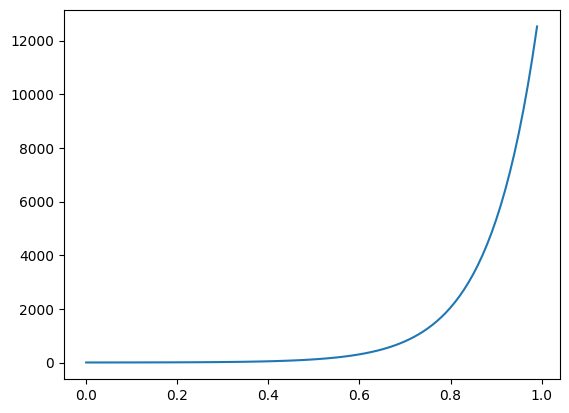

In [319]:
plt.plot(t,y)

Ejercicio 2

In [320]:
def logistica(h,a,b,P0,r,K):
    n = int((b-a)/h)
    t = np.arange(a,b,h)
    P = [0 for i in range(n)]
    P[0] = P0

    for i in range(n-1):
        P[i+1] = P[i] + h*(r*P[i]*(1-(P[i]/K)))

    return (t, P)

In [321]:
K = 100
r = 2
P0 = 10

In [322]:
t, P = logistica(0.01,0,10,P0,r,K)

In [323]:
P1 = [(K/(1+((K-P0)/P0*np.exp(-r*i)))) for i in t]

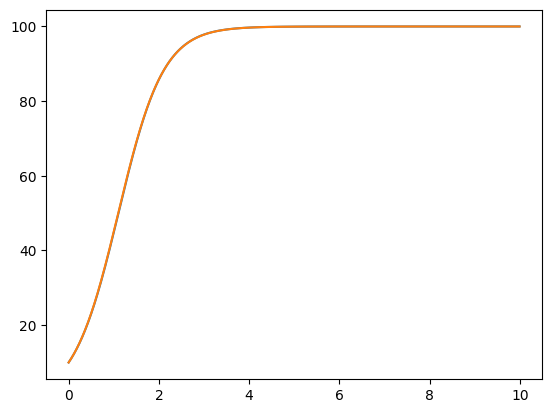

In [324]:
plt.plot(t,P)
plt.plot(t, P1)

In [325]:
def errorh(M, funcion):
    e = [0 for i in range(M)]
    h = [0 for j in range(M)]
    for i in range(M):
        H = 2**(-i)
        h[i] = H
        t,P = funcion(H, 0, 10, P0, r, K)
        P1 = [(K/(1+((K-P0)/P0*np.exp(-r*i)))) for i in t]
        e[i] = abs(P[-1]-P1[-1])
    return (e, h)

In [326]:
e, h = errorh(8, logistica)

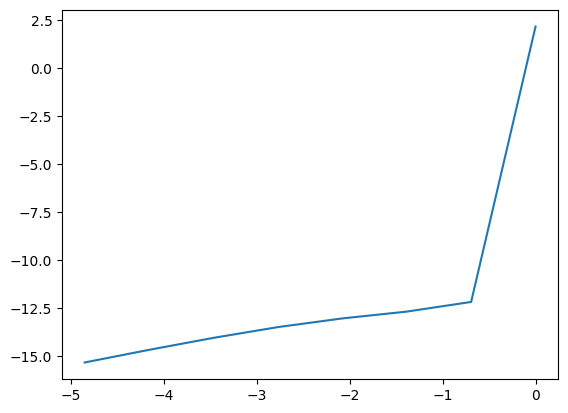

In [327]:
plt.plot(np.log(h),np.log(e))

In [328]:
def f(t, P):
    return r*P*(1-(P/K))

In [329]:
def logistica2(h,a,b,P0,r,K):
    n = int((b-a)/h)
    t = np.arange(a,b,h)
    P = [0 for i in range(n)]
    P[0] = P0

    for i in range(n-1):
        P[i+1] = P[i] + h*f(t[i]+(h/2), P[i]+(h/2)*f(t[i], P[i]))

    return (t, P)

In [330]:
e, h = errorh(8, logistica2)

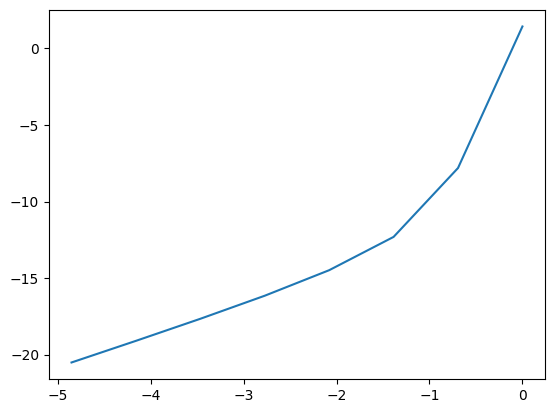

In [331]:
plt.plot(np.log(h),np.log(e))

In [332]:
def Euler(a,b,n,F,y0):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        y[:,i+1] = y[:,i] + h*(F(t[i], y[:,i]))
    
    return (t,y)

In [333]:
def Heun(a,b,n,F,y0):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = [0 for i in range(n)]
    y[0] = y0

    for i in range(n-1):
        K1 = F(t[i], y[i])
        K2 = F(t[i]+(2/3)*h, y[i]+(2/3)*h*K1)
        y[i+1] = y[i] + h*((1/4)*K1+(3/4)*K2)
    
    return (t,y)

In [334]:
def r(t):
    return (0.2 + 0.2*np.cos(2*np.pi*t))

In [335]:
K = 1000
m = 0.1

In [336]:
def g(ti,yi):
    return r(ti)*yi*(1-(yi/K))-m*yi

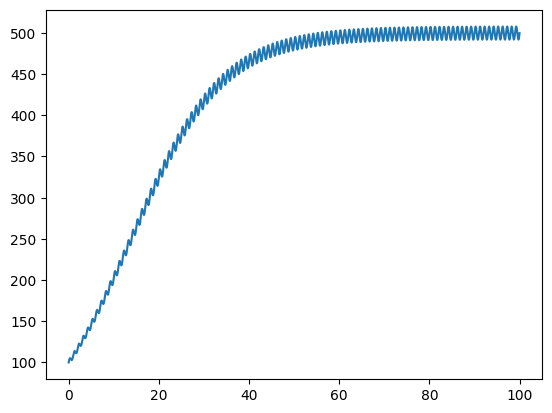

In [337]:
t, y = Heun(0, 100, 18250, g, 100)
plt.plot(t,y)

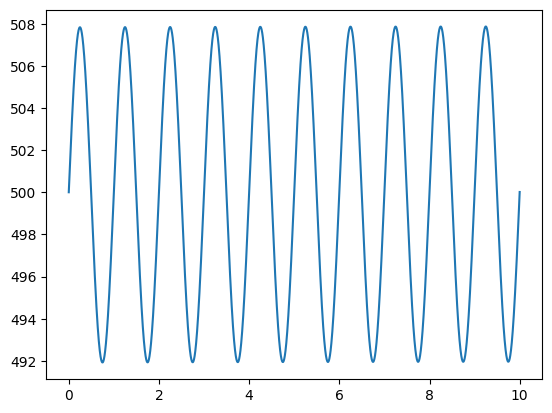

In [338]:
t, y = Heun(0, 10, 18250, g, 500)
plt.plot(t,y)

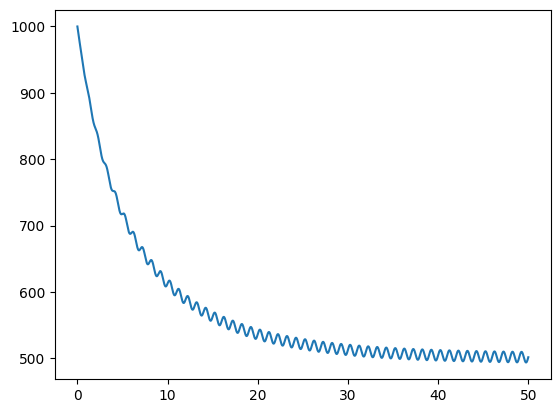

In [339]:
t, y = Heun(0, 50, 18250, g, 1000)
plt.plot(t,y)

Ejercicio 4

In [340]:
def RungeKuttaGen(a,b,n,F,y0,alp,A1,A2):
    h = (b-a)/n
    t = np.arange(a,b,h)
    y = np.zeros((len(y0), n))
    y[:,0] = y0

    for i in range(n-1):
        K1 = F(t[i], y[:,i])
        K2 = F(t[i]+alp*h, y[:,i]+alp*h*K1)
        y[:,i+1] = y[:,i] + h*(A1*K1+A2*K2)

    return (t, y)

Ejercicio 5

In [341]:
g = 9.81
cr = 0.028
m = 0.084
y0 = np.array([50, -3])

In [342]:
def T(t,v):
    return np.array([-v[1], g - (cr/m)*((v[1])**2)])

In [343]:
t, v = RungeKuttaGen(0, 5, 100, T, y0, 2/3, 1/4, 3/4)

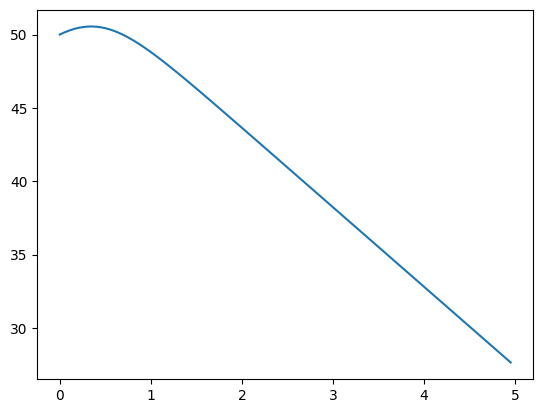

In [344]:
plt.plot(t,v[0])

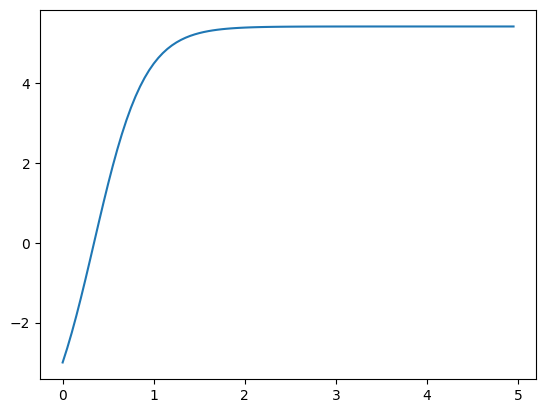

In [345]:
plt.plot(t,v[1])

Ejercicio 6

In [346]:
alpha = 0.5
beta = 0.5
gamma = 0.5
delta = 0.5
y0 = np.array([10,20])

In [347]:
def L(t,z):
    return np.array([-alpha*z[0]+gamma*z[0]*z[1], beta*z[1]-delta*z[0]*z[1]])

In [348]:
t, z = Euler(0, 20, 1000, L, y0)

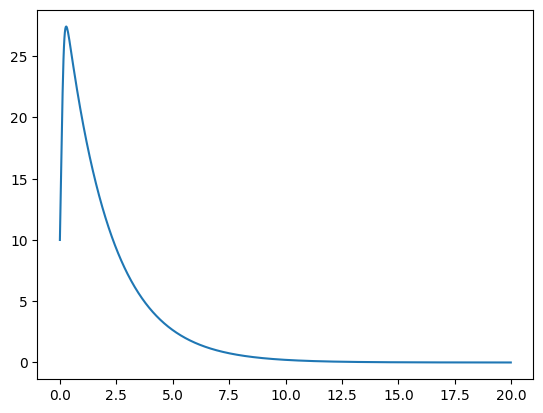

In [349]:
plt.plot(t,z[0])

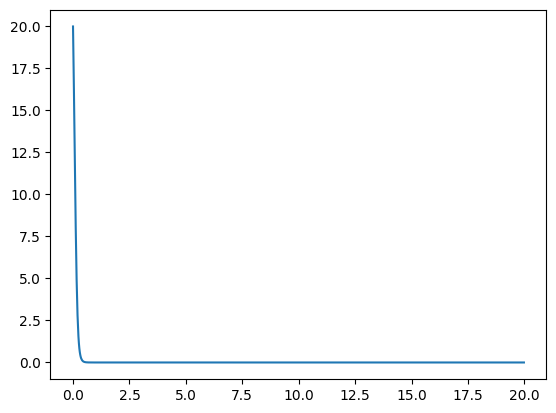

In [350]:
plt.plot(t,z[1])

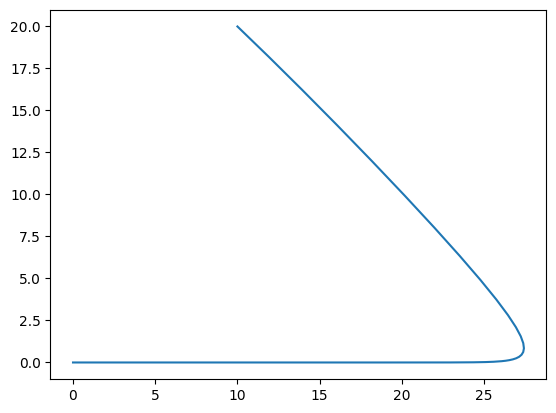

In [351]:
plt.plot(z[0],z[1])

In [352]:
alpha = 0.25
beta = 1
gamma = 0.01
delta = 0.01
y0 = np.array([80,30])

In [353]:
t, z = Euler(0, 20, 10000, L, y0)

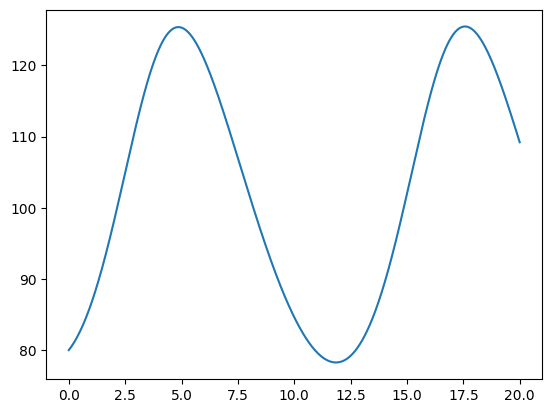

In [354]:
plt.plot(t,z[0])

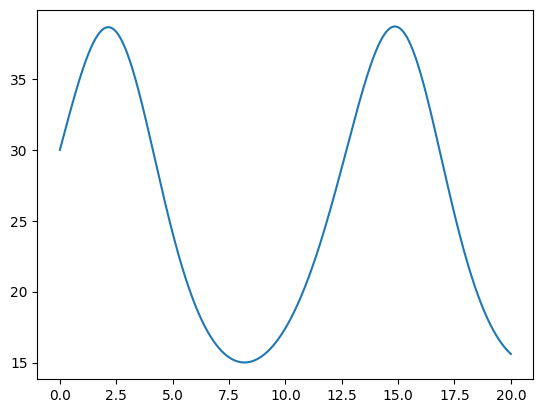

In [355]:
plt.plot(t,z[1])

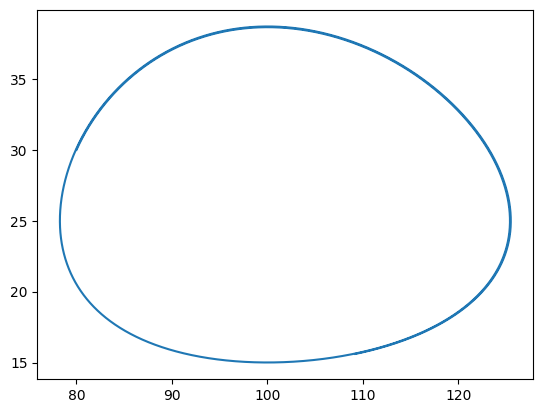

In [356]:
plt.plot(z[0],z[1])

Ejercicio 8

In [357]:
beta = 10
gamma = 0.1
N = 100000
y0 = [N-1000, 1000, 0]

In [358]:
def G(t, y):
    return np.array([-beta*(y[0]*y[1]/N), beta*(y[0]*y[1]/N) - gamma*y[1], gamma*y[1]])

In [359]:
t, y = Euler(0, 20, 10000, G, y0)

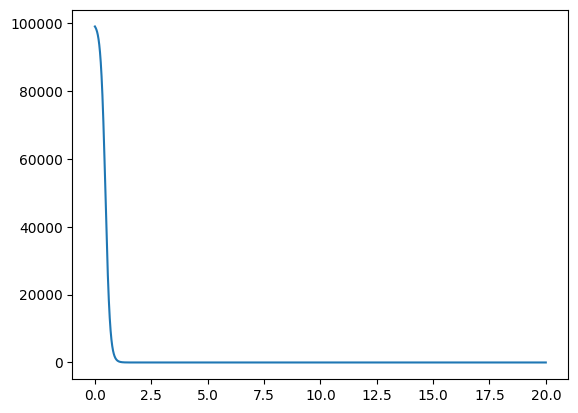

In [360]:
plt.plot(t, y[0])

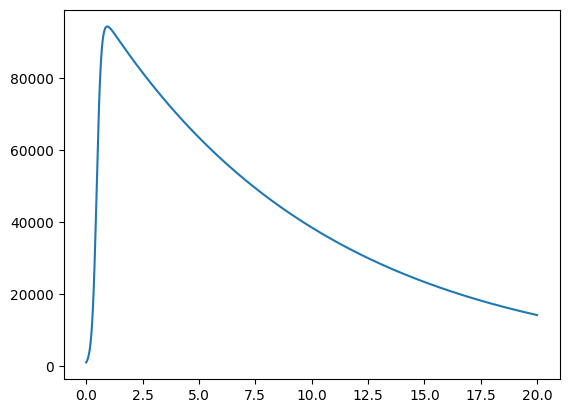

In [361]:
plt.plot(t, y[1])

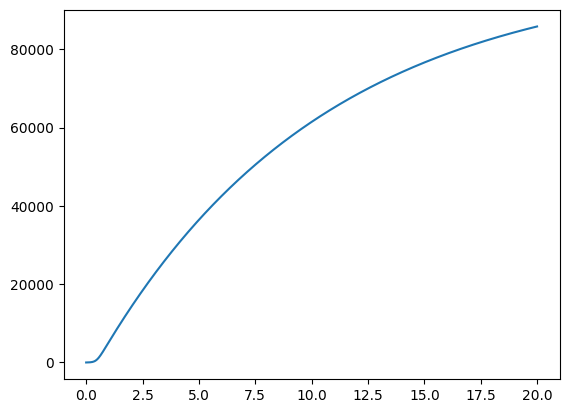

In [362]:
plt.plot(t, y[2])

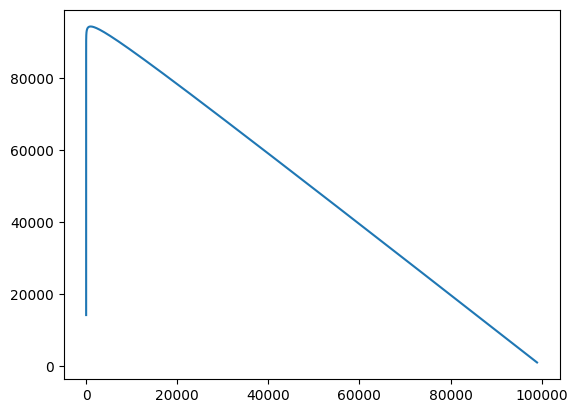

In [363]:
plt.plot(y[0], y[1])

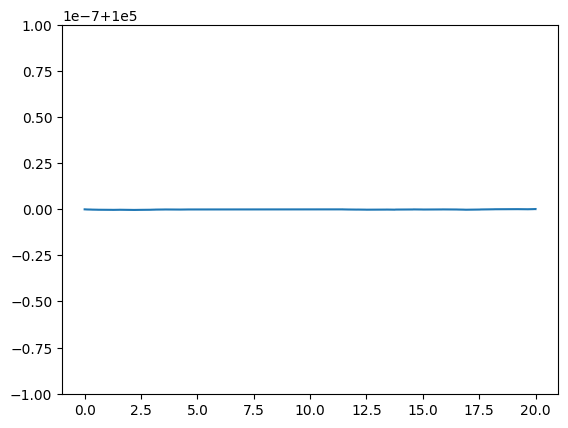

In [364]:
plt.plot(t, y[0]+y[1]+y[2])

In [365]:
y[0]+y[1]+y[2]

array([100000., 100000., 100000., ..., 100000., 100000., 100000.],
      shape=(10000,))

In [366]:
[i for i in range(len(y[0])) if y[0][i] < (N*gamma)/beta][0]

468

In [367]:
t[468]

np.float64(0.936)

Ejercicio 9

In [368]:
r = 1
K = 1
tau = 1
N0 = [0.5, 0.5]

In [369]:
def H(t,N,Nt):
    return (r*N*(1-(Nt/K)))

In [370]:
def hutchinson(a,b,n,H,N0,tau):
    h = (b-a)/n
    t = np.arange(a,b,h)
    N = np.zeros((len(N0), n))
    N[:,0] = N0

    for i in range(n-1):
        if t[i] <= tau:
            N[1][i+1] = N0[1]
            N[0][i+1] = N[0][i] + h*(r*N[0][i]*(1-(N[1][i]/K)))
        elif t[i] > tau:
            N[1][i+1] = N[1][i] + h*(r*N[1][i]*(1-(N[1][i-int(tau/h)]/K)))
            N[0][i+1] = N[0][i] + h*(r*N[0][i]*(1-(N[1][i]/K)))
            
    return (t,N)

In [371]:
t, N = hutchinson(0, 40, 1000, H, N0, tau)

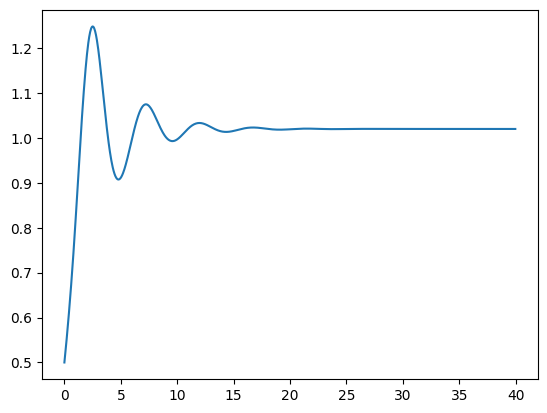

In [372]:
plt.plot(t, N[0])

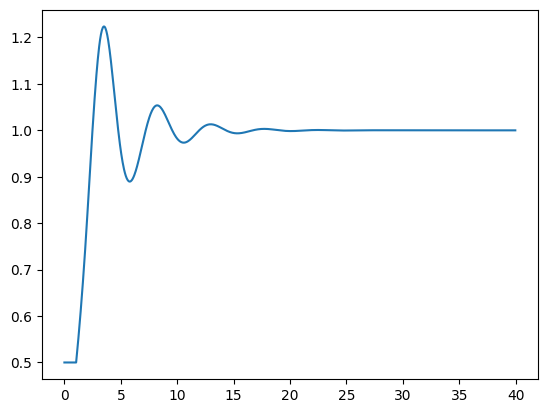

In [373]:
plt.plot(t, N[1])

Ejercicio 14.1

In [374]:
df  =  pd.read_csv("hudson.txt", delim_whitespace = True , header = None)

C:\Users\bravo\AppData\Local\Temp\ipykernel_13672\2569439821.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df  =  pd.read_csv("hudson.txt", delim_whitespace = True , header = None)


In [375]:
df.loc[31, 1] = '97.12'

In [376]:
tiempo = [df[0][i] for i in range(len(df))]

In [377]:
linces = [float(df[1][i].replace(",",".")) for i in range(len(df))]

In [378]:
liebres = [float(df[2][i].replace(",",".")) for i in range(len(df))]

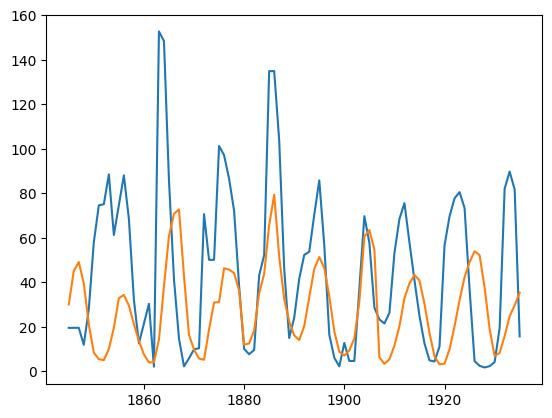

In [379]:
plt.plot(tiempo, linces)
plt.plot(tiempo, liebres)

In [380]:
alpha = 0.4
beta = 1
gamma = 0.08
delta = 0.08
y0 = np.array([20,30])

In [381]:
t, y = Euler(0, 90, 1000, L, y0)

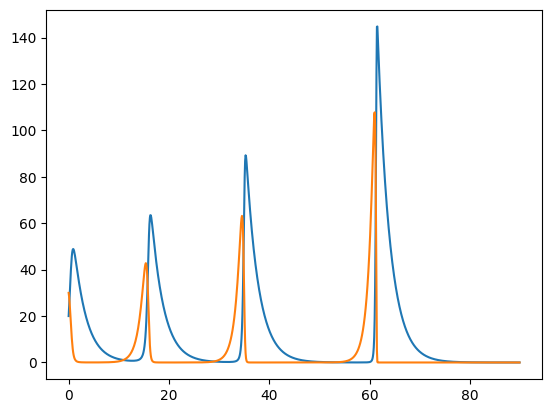

In [382]:
plt.plot(t, y[0])
plt.plot(t, y[1])

In [383]:
prom = np.array([[0,0] for i in range(len(linces))])
prom[0] = [linces[0], liebres[0]]
prom[len(linces)-1] = [linces[len(linces)-1], liebres[len(linces)-1]]
for i in range(1,len(linces)-1):
    prom[i][0] = (linces[i-1] + linces[i] + linces[i+1])/3
    prom[i][1] = (liebres[i-1] + liebres[i] + liebres[i+1])/3

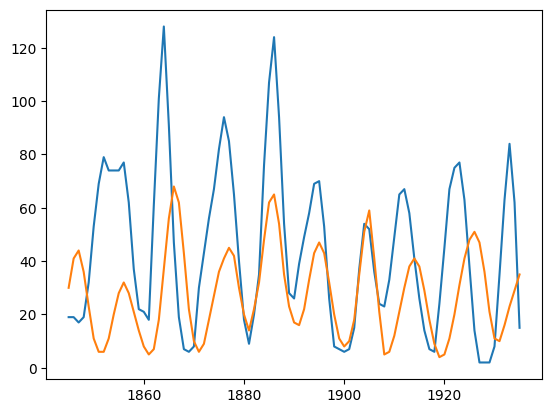

In [387]:
plt.plot(tiempo, prom[:,0])
plt.plot(tiempo, prom[:,1])

Ejercicio 14.2

In [ ]:
eps = 0
k1 = 0
k2 = 0

In [ ]:
def intra(t, y):
    return np.array([-alpha*y[0]+gamma*y[0]*y[1], beta*y[1]-delta*y[0]*y[1]-eps*(y[1]**2)])

In [ ]:
def holling(t, y):
    return np.array([-alpha*y[0]+gamma*y[0]*y[1]/(1+k1*y[1]), beta*y[1]-delta*y[0]*y[1]/(1+k2*y[1])])